<a href="https://colab.research.google.com/github/Deb-bee/Deb-bee/blob/main/UCI_HAR_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving UCI HAR Dataset (2).zip to UCI HAR Dataset (2).zip


In [6]:
print(uploaded.keys())

dict_keys(['UCI HAR Dataset (2).zip'])


In [7]:
import zipfile

# Path to the uploaded zip file
zip_path = list(uploaded.keys())[0]

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

# Print contents of the current directory after extraction
print("UCI HAR Dataset (2).zip:", os.listdir())

UCI HAR Dataset (2).zip: ['.config', 'UCI HAR Dataset (2).zip', 'UCI HAR Dataset.zip', 'sample_data']


In [8]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print(zip_ref.namelist())  # List all files and folders in the zip


['UCI HAR Dataset.zip']


In [10]:
import zipfile

# Path to the outer zip file
zip_path = 'UCI HAR Dataset (2).zip'

# Extract the outer zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

# Check the contents of the current directory
import os
print("Contents After Extracting Outer Zip:", os.listdir())

Contents After Extracting Outer Zip: ['.config', 'UCI HAR Dataset (2).zip', 'UCI HAR Dataset.zip', 'sample_data']


In [11]:
# Path to the inner zip file
inner_zip_path = 'UCI HAR Dataset.zip'

# Extract the inner zip file
with zipfile.ZipFile(inner_zip_path, 'r') as zip_ref:
    zip_ref.extractall()

# Check the contents of the current directory
print("Contents After Extracting Inner Zip:", os.listdir())

Contents After Extracting Inner Zip: ['.config', 'UCI HAR Dataset', 'UCI HAR Dataset (2).zip', '__MACOSX', 'UCI HAR Dataset.zip', 'sample_data']


In [12]:
import zipfile
import os

# Path to the outer zip file
zip_path = 'UCI HAR Dataset (2).zip'

# Step 1: Extract the outer zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

# Check the contents of the current directory
print("Contents After Extracting Outer Zip:", os.listdir())

# Path to the inner zip file
inner_zip_path = 'UCI HAR Dataset.zip'

# Step 2: Extract the inner zip file
with zipfile.ZipFile(inner_zip_path, 'r') as zip_ref:
    zip_ref.extractall()

# Check the contents of the current directory
print("Contents After Extracting Inner Zip:", os.listdir())

# Step 3: Verify the dataset
dataset_folder = 'UCI HAR Dataset'
if dataset_folder in os.listdir():
    print("Contents of Dataset Folder:", os.listdir(dataset_folder))
else:
    print(f"Folder '{dataset_folder}' not found. Available folders: {os.listdir()}")

Contents After Extracting Outer Zip: ['.config', 'UCI HAR Dataset', 'UCI HAR Dataset (2).zip', '__MACOSX', 'UCI HAR Dataset.zip', 'sample_data']
Contents After Extracting Inner Zip: ['.config', 'UCI HAR Dataset', 'UCI HAR Dataset (2).zip', '__MACOSX', 'UCI HAR Dataset.zip', 'sample_data']
Contents of Dataset Folder: ['.DS_Store', 'activity_labels.txt', 'README.txt', 'train', 'test', 'features.txt', 'features_info.txt']


In [16]:
import pandas as pd

# Load training data
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None)

# Load test data
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None)
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None)

# Load feature names
features = pd.read_csv('UCI HAR Dataset/features.txt', sep='\s+', header=None)
X_train.columns = features[1]  # Set column names
X_test.columns = features[1]

# Load activity labels
activity_labels = pd.read_csv('UCI HAR Dataset/activity_labels.txt', sep='\s+', header=None)
activity_dict = dict(zip(activity_labels[0], activity_labels[1]))  # Create a mapping dictionary
y_train = y_train[0].map(activity_dict)  # Map activity IDs to names
y_test = y_test[0].map(activity_dict)

In [14]:
print(X_train.isnull().sum().sum())  # Check for missing values in training data
print(X_test.isnull().sum().sum())   # Check for missing values in test data

0
0


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)        # Transform test data

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)  # Initialize KNN with k=3

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
y_pred = knn.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 89.07%
Confusion Matrix:
[[535   1   1   0   0   0]
 [  0 383 105   0   0   3]
 [  0  57 475   0   0   0]
 [  0   0   0 481  11   4]
 [  0   0   0  49 329  42]
 [  0   0   0  36  13 422]]
Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.87      0.78      0.82       491
          STANDING       0.82      0.89      0.85       532
           WALKING       0.85      0.97      0.91       496
WALKING_DOWNSTAIRS       0.93      0.78      0.85       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

          accuracy                           0.89      2947
         macro avg       0.89      0.89      0.89      2947
      weighted avg       0.89      0.89      0.89      2947



In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 20)}

# Perform grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best k value
print(f"Best k: {grid_search.best_params_['n_neighbors']}")

Best k: 16


In [23]:
best_k = grid_search.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [24]:
import joblib

# Save the model
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [26]:
knn = joblib.load('knn_model.pkl')

In [27]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=16))])

In [29]:
# Use the first 5 rows of the test data as new_data
new_data = X_test[:5]

# Make predictions
new_predictions = pipeline.predict(new_data)
print("Predictions:", new_predictions)

Predictions: ['STANDING' 'STANDING' 'STANDING' 'STANDING' 'STANDING']


In [30]:
# Use the first 5 rows of the test data as new_data
new_data = X_test[:5]

# Make predictions
new_predictions = pipeline.predict(new_data)

# Print the predictions
print("Predictions:", new_predictions)

# Compare with actual labels
print("Actual Labels:", y_test[:5].values)

Predictions: ['STANDING' 'STANDING' 'STANDING' 'STANDING' 'STANDING']
Actual Labels: ['STANDING' 'STANDING' 'STANDING' 'STANDING' 'STANDING']


In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 20)}

# Perform grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best k value
print(f"Best k: {grid_search.best_params_['n_neighbors']}")

Best k: 16


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Accuracy: 33.36%
Confusion Matrix:
[[406   3   0 123   3   2]
 [ 96 111   8 267   2   7]
 [ 52  35  46 356  26  17]
 [  0   0   0   0 496   0]
 [  0   0   0   0 420   0]
 [  0   0   0   0 471   0]]
Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.73      0.76      0.74       537
           SITTING       0.74      0.23      0.35       491
          STANDING       0.85      0.09      0.16       532
           WALKING       0.00      0.00      0.00       496
WALKING_DOWNSTAIRS       0.30      1.00      0.46       420
  WALKING_UPSTAIRS       0.00      0.00      0.00       471

          accuracy                           0.33      2947
         macro avg       0.44      0.34      0.28      2947
      weighted avg       0.45      0.33      0.29      2947



In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 20)}

# Perform grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")

# Retrain the model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

Best k: 18


KNeighborsClassifier(n_neighbors=18)

In [35]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=50)  # Reduce to 50 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Retrain the model
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=18)

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9260264675941635


In [37]:
import joblib

# Save the model
joblib.dump(knn, 'knn_model.pkl')

# Load the model
knn = joblib.load('knn_model.pkl')

In [38]:
from sklearn.pipeline import Pipeline

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=18))])

In [39]:
# Example new data (replace with actual data)
new_data = X_test[:5]  # Use a sample from the test data

# Make predictions
new_predictions = pipeline.predict(new_data)
print("Predictions:", new_predictions)

Predictions: ['STANDING' 'STANDING' 'STANDING' 'STANDING' 'STANDING']


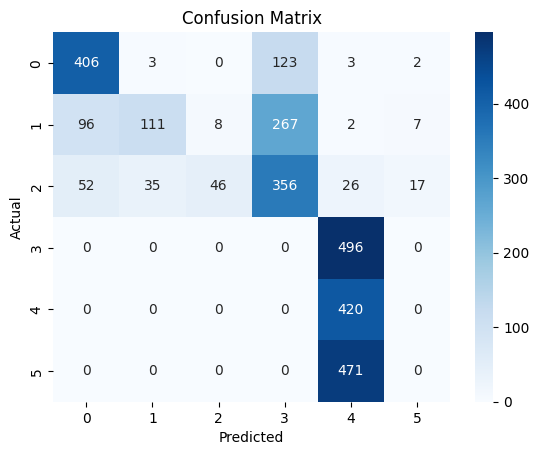

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()